In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Weigh initialization

Initialize with small random numbers (gaussian with 0 mean and 1e-2 std)
- if we use tanh activation function work well with small networks, but problems with deeper networks

In [4]:
# Data
# sigma * np.random.randn(...) + mu
X = np.random.randn(1000, 500)

In [5]:
relu = lambda x: np.maximum(0, x)
tanh = lambda x: np.tanh(x)

In [6]:
hs = {}
out = X
for i in range(10):
    w = np.random.randn(500, 500)*0.01
    h = out.dot(w) 
    h = tanh(h)
    hs[i] = h
    out = h
    layer_mean = np.mean(h)
    layer_std = np.std(h)
    print(f"Hidden layer {i+1} : mean {layer_mean:.6f}, std {layer_std:.6f}")

Hidden layer 1 : mean 0.000965, std 0.213323
Hidden layer 2 : mean -0.000010, std 0.047503
Hidden layer 3 : mean 0.000012, std 0.010630
Hidden layer 4 : mean -0.000001, std 0.002384
Hidden layer 5 : mean -0.000000, std 0.000533
Hidden layer 6 : mean -0.000000, std 0.000120
Hidden layer 7 : mean 0.000000, std 0.000027
Hidden layer 8 : mean 0.000000, std 0.000006
Hidden layer 9 : mean 0.000000, std 0.000001
Hidden layer 10 : mean 0.000000, std 0.000000


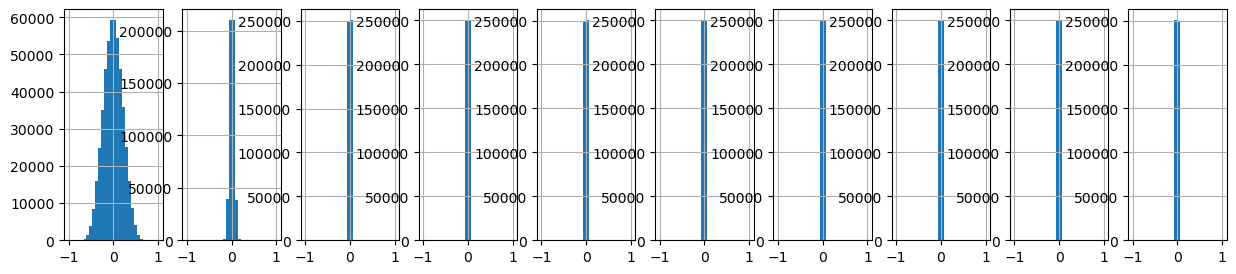

In [7]:
plt.figure(figsize=(15,3))
for i, h in hs.items():
    plt.subplot(1, len(hs), i+1)
    plt.hist(h.ravel(), 30, range=(-1, 1));
    plt.grid()

Initialize with small random numbers (gaussian with 0 mean and 1.0 std)
- problem with tanh saturated at -1 and 1

In [8]:
hs = {}
out = X
for i in range(10):
    w = np.random.randn(500, 500)*1.0
    h = out.dot(w) 
    h = tanh(h)
    hs[i] = h
    out = h
    layer_mean = np.mean(h)
    layer_std = np.std(h)
    print(f"Hidden layer {i+1} : mean {layer_mean:.6f}, std {layer_std:.6f}")

Hidden layer 1 : mean -0.002143, std 0.981805
Hidden layer 2 : mean -0.002419, std 0.981604
Hidden layer 3 : mean 0.001123, std 0.981682
Hidden layer 4 : mean -0.000893, std 0.981697
Hidden layer 5 : mean -0.001430, std 0.981716
Hidden layer 6 : mean -0.001396, std 0.981722
Hidden layer 7 : mean 0.000414, std 0.981812
Hidden layer 8 : mean -0.000283, std 0.981645
Hidden layer 9 : mean 0.001084, std 0.981868
Hidden layer 10 : mean -0.000856, std 0.981813


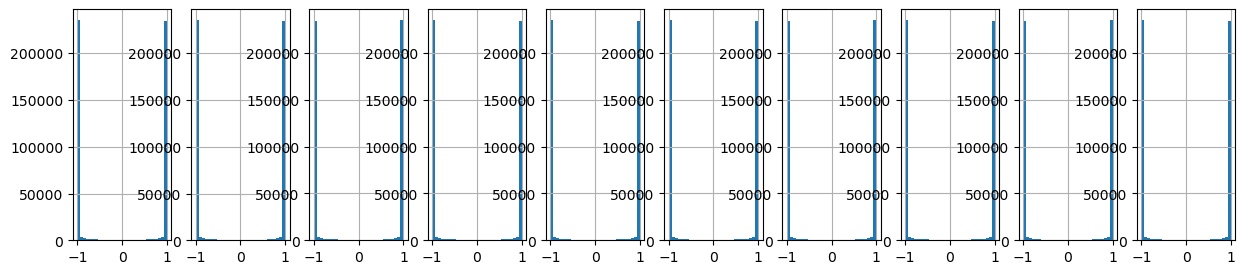

In [9]:
plt.figure(figsize=(15,3))
for i, h in hs.items():
    plt.subplot(1, len(hs), i+1)
    plt.hist(h.ravel(), 30, range=(-1, 1));
    plt.grid()

Initialize from Xavier initialization divide by sqrt(in_features)

In [10]:
hs = {}
out = X
in_features, out_features = 500, 500
for i in range(10):
    w = np.random.randn(in_features, out_features)/np.sqrt(in_features)
    h = out.dot(w) 
    h = tanh(h)
    hs[i] = h
    out = h
    layer_mean = np.mean(h)
    layer_std = np.std(h)
    print(f"Hidden layer {i+1} : mean {layer_mean:.6f}, std {layer_std:.6f}")

Hidden layer 1 : mean 0.001353, std 0.627471
Hidden layer 2 : mean 0.001001, std 0.485456
Hidden layer 3 : mean -0.000494, std 0.407984
Hidden layer 4 : mean 0.000549, std 0.359635
Hidden layer 5 : mean -0.000509, std 0.323369
Hidden layer 6 : mean -0.000807, std 0.295357
Hidden layer 7 : mean -0.000588, std 0.271639
Hidden layer 8 : mean -0.000125, std 0.255176
Hidden layer 9 : mean 0.000041, std 0.239638
Hidden layer 10 : mean -0.000125, std 0.227400


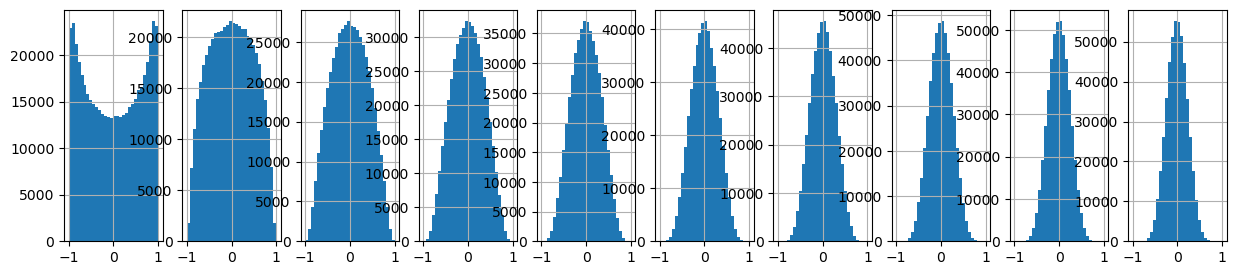

In [11]:
plt.figure(figsize=(15,3))
for i, h in hs.items():
    plt.subplot(1, len(hs), i+1)
    plt.hist(h.ravel(), 30, range=(-1, 1));
    plt.grid()

Initialize from uniform(-sqrt(-k), sqrt(k)) where k = 1/in_feature (follow torch.nn.Linear)

In [12]:
hs = {}
out = X
in_features, out_features = 500, 500
for i in range(10):
    bound = 1/np.sqrt(in_features)
    w = np.random.uniform(-bound, bound, (in_features, out_features))
    h = out.dot(w) 
    h = tanh(h)
    hs[i] = h
    out = h
    layer_mean = np.mean(h)
    layer_std = np.std(h)
    print(f"Hidden layer {i+1} : mean {layer_mean:.6f}, std {layer_std:.6f}")

Hidden layer 1 : mean 0.000908, std 0.460327
Hidden layer 2 : mean 0.000079, std 0.249921
Hidden layer 3 : mean -0.000232, std 0.141533
Hidden layer 4 : mean -0.000059, std 0.080762
Hidden layer 5 : mean -0.000040, std 0.046498
Hidden layer 6 : mean 0.000008, std 0.026705
Hidden layer 7 : mean -0.000012, std 0.015314
Hidden layer 8 : mean 0.000017, std 0.008812
Hidden layer 9 : mean -0.000005, std 0.005065
Hidden layer 10 : mean -0.000002, std 0.002913


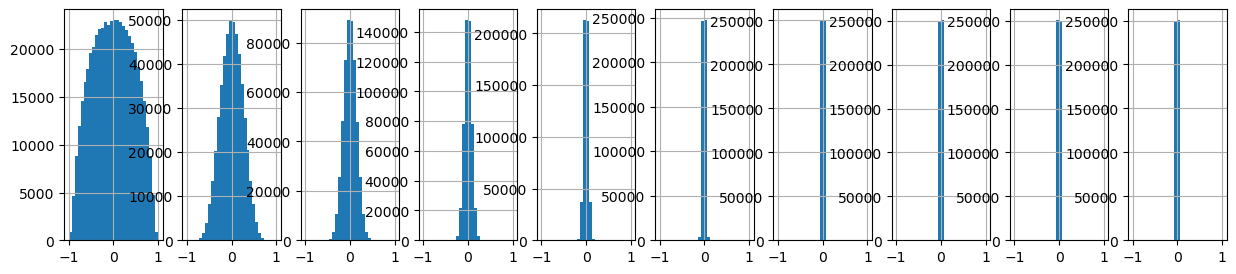

In [13]:
plt.figure(figsize=(15,3))
for i, h in hs.items():
    plt.subplot(1, len(hs), i+1)
    plt.hist(h.ravel(), 30, range=(-1, 1));
    plt.grid()

Kaiming or He Initialization w - N(0, 2/n) with tanh

In [18]:
hs = {}
out = X
in_features, out_features = 500, 500
for i in range(10):
    w = np.random.randn(in_features, out_features)*np.sqrt(2/in_features)
    h = out.dot(w) 
    h = tanh(h)
    hs[i] = h
    out = h
    layer_mean = np.mean(h)
    layer_std = np.std(h)
    print(f"Hidden layer {i+1} : mean {layer_mean:.6f}, std {layer_std:.6f}")

Hidden layer 1 : mean -0.000462, std 0.720631
Hidden layer 2 : mean -0.000729, std 0.633280
Hidden layer 3 : mean 0.000268, std 0.595401
Hidden layer 4 : mean 0.001282, std 0.576887
Hidden layer 5 : mean 0.000053, std 0.568242
Hidden layer 6 : mean -0.000148, std 0.561707
Hidden layer 7 : mean 0.000283, std 0.557334
Hidden layer 8 : mean 0.000075, std 0.556798
Hidden layer 9 : mean -0.000033, std 0.555987
Hidden layer 10 : mean 0.001189, std 0.555275


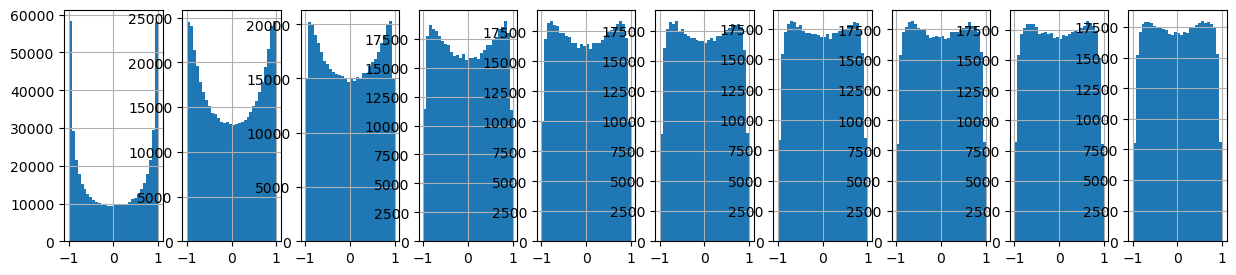

In [19]:
plt.figure(figsize=(15,3))
for i, h in hs.items():
    plt.subplot(1, len(hs), i+1)
    plt.hist(h.ravel(), 30, range=(-1, 1));
    plt.grid()

Kaiming or He Initialization w - N(0, 2/n) with relu

In [26]:
hs = {}
out = X
in_features, out_features = 500, 500
for i in range(10):
    w = np.random.randn(in_features, out_features)*np.sqrt(2/in_features)
    h = out.dot(w) 
    h = relu(h)
    hs[i] = h
    out = h
    layer_mean = np.mean(h)
    layer_std = np.std(h)
    print(f"Hidden layer {i+1} : mean {layer_mean:.6f}, std {layer_std:.6f}")

Hidden layer 1 : mean 0.564213, std 0.827074
Hidden layer 2 : mean 0.567495, std 0.829444
Hidden layer 3 : mean 0.568546, std 0.824676
Hidden layer 4 : mean 0.553307, std 0.802742
Hidden layer 5 : mean 0.532122, std 0.787845
Hidden layer 6 : mean 0.496798, std 0.739424
Hidden layer 7 : mean 0.497063, std 0.719188
Hidden layer 8 : mean 0.495742, std 0.755676
Hidden layer 9 : mean 0.516981, std 0.790644
Hidden layer 10 : mean 0.547359, std 0.812383


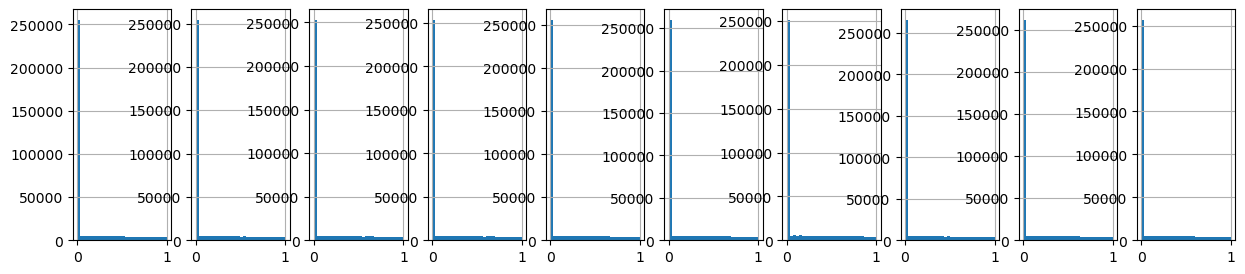

In [27]:
plt.figure(figsize=(15,3))
for i, h in hs.items():
    plt.subplot(1, len(hs), i+1)
    plt.hist(h.ravel(), 30, range=(0, 1));
    plt.grid()